In [110]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from matplotlib import pyplot
import rasterio as rs
from rasterio.plot import show
from rasterio import Affine as A
from rasterio.warp import calculate_default_transform, reproject, Resampling
from shapely.geometry import Polygon
from rasterio.mask import mask
%matplotlib inline

### 1) Plot of the DTM tiff in Bruges downtonw based on a random coordinates

In [159]:
#open of the DTM tiff
img = rs.open('DHMVIIDTMRAS1m_k13\GeoTIFF\DHMVIIDTMRAS1m_k13.tif')


In [230]:
# enter of random downtown Bruges coordinates based on EPSG:31370 and square length edgelen
x, y, edgelen = 70113.63, 211849.77, 200  

In [222]:
#creation of the region of interest (roi), a square
roi = Polygon([(x - int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y - int(edgelen / 2)),
               (x - int(edgelen / 2), y - int(edgelen / 2))])

In [223]:
#print polygon 
print(roi)

POLYGON ((70013.63 211949.77, 70213.63 211949.77, 70213.63 211749.77, 70013.63 211749.77, 70013.63 211949.77))


In [224]:
#creation of the mask based on roi
crop_img, crop_transform = mask(img, shapes=[roi], crop = True, filled = False)

<AxesSubplot:>

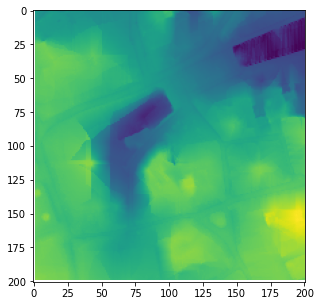

In [225]:
#plot of the DTM
fig, ax = plt.subplots(figsize=(5,5))
show((crop_img), ax=ax)

### 2) Plot of the DSM tiff in Bruges downtonw based on a random coordinates

In [226]:
#open of the DSM
img2 = rs.open('DHMVIIDSMRAS1m_k13\GeoTIFF\DHMVIIDSMRAS1m_k13.tif')

In [227]:
#creation of the mask based on roi
crop_img2, crop_transform = mask(img2, shapes=[roi], crop = True, filled = False)

<AxesSubplot:>

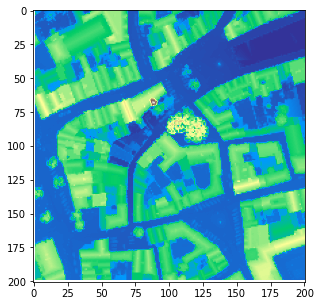

In [228]:
#plot of the DSM
fig, ax = plt.subplots(figsize=(5,5))
show((crop_img2), ax=ax, cmap = 'terrain')